## Validação

Código adaptado de http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

### Importações

In [8]:
# encoding=utf-8
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# from sklearn.model_selection import train_test_split  # OU
from sklearn.cross_validation import train_test_split  

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

# classificador
# from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# definição de cores para a projeção
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

### Preparação conjunto de dados: carga e pré-processamento

In [9]:
h = .02  # espaçamento dos pontos na projeção de cores
test_size = .2  # tamanho do conjunto de testes
seed = 42  # seed para geração do conjunto de dados
k = 3

X, y = make_moons(noise=0.15, random_state=0)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


### Definição do modelo 

In [10]:
# clf = DecisionTreeClassifier(max_depth=5)
clf = KNeighborsClassifier(n_neighbors=k)
name = 'kNN'

clf.fit(X_train, y_train)  # adequa o modelo aos dados de treino
y_pred = clf.predict(X_test)  # realiza predições

acc = accuracy_score(y_test, y_pred)  # verifica acurácia

### Projeção da fronteira de decisão

Acurácia com 20% do conjunto de dados para teste: 1.00


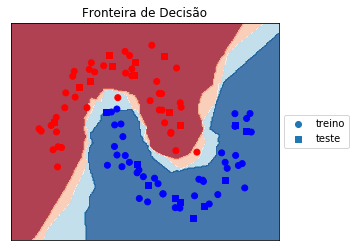

In [11]:
fig = plt.figure()
ax = plt.subplot(111)
plt.title(u"Fronteira de Decisão")

# projeta a fronteira de decisão
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# faz uma projeção de cores
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# projeta dados de treino
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', cmap=cm_bright, label='treino')
# projeta dados de teste
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', cmap=cm_bright, label='teste')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
print u'Acurácia com %d%% do conjunto de dados para teste: %.2f' % (test_size * 100, acc)

plt.show()


---

### Divisão entre treino, teste e validação (holdout)

### Conjunto de dados

In [15]:
# conjunto de dados
import numpy as np
from collections import Counter  # conta e agrupa itens em uma coleção

n_instances, n_attributes = 100, 2

X, y = (
    np.random.randint(100, size=(n_instances, n_attributes)), 
    np.random.choice([0, 1], size=n_instances, replace=True)
)

In [6]:
# from sklearn.model_selection import train_test_split  # OU
from sklearn.cross_validation import train_test_split  

X_HOLD, X_test, y_HOLD, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_HOLD, y_HOLD, test_size=0.2, stratify=y_HOLD)

print 'Número de instâncias e distribuição de classes no conjunto de    treino:', X_train.shape[0], Counter(y_train)
print 'Número de instâncias e distribuição de classes no conjunto de     teste:', X_test.shape[0], Counter(y_test)
print 'Número de instâncias e distribuição de classes no conjunto de validação:', X_val.shape[0], Counter(y_val)

Número de instâncias e distribuição de classes no conjunto de    treino: 64 Counter({1: 33, 0: 31})
Número de instâncias e distribuição de classes no conjunto de     teste: 20 Counter({0: 10, 1: 10})
Número de instâncias e distribuição de classes no conjunto de validação: 16 Counter({0: 8, 1: 8})


### Divisão por validação cruzada (k-fold cross validation)

In [38]:
from sklearn.cross_validation import StratifiedKFold  # OU
# from sklearn.model_selection import StratifiedKFold  

n_folds = 5

skf = StratifiedKFold(y, n_folds)
for i, (train_index, test_index) in enumerate(skf):
    print train_index
    print test_index

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print 'Número de instâncias e distribuição de classes no treino do fold %d:' % i, X_train.shape[0], Counter(y_train)
    print 'Número de instâncias e distribuição de classes no  teste do fold %d:' % i, X_test.shape[0], Counter(y_test)

[19 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94
 95 96 97 98 99]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20]
Número de instâncias e distribuição de classes no treino do fold 0: 80 Counter({0: 40, 1: 40})
Número de instâncias e distribuição de classes no  teste do fold 0: 20 Counter({0: 10, 1: 10})
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 36 38 39 40 43
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94
 95 96 97 98 99]
[19 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 37 41 42 44]
Número de instâncias e distribuição de classes no treino do fold 1: 80 Counter({0: 40, 1: 40})
Número de instâncias e distribuição de classes no  teste do fold 1: 20 Counter({0: 10, 1: 10})
[ 0  1

In [27]:
import numpy as np
import pandas as pd
from collections import Counter  # conta e agrupa itens em uma coleção
from sklearn.cross_validation import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import confusion_matrix

def getAccuracy(testset, predictions):
    correct = 0
    for id_test, test in testset.iterrows():
        if test[-1] == predictions.ix[id_test][0]:
            correct += 1
    return (correct / float(len(testset))) * 100.0

def main():
    rh = pd.read_csv('RHs.csv', nrows=None, header=0, index_col=None)
    trainset, testset, = train_test_split(rh, test_size=0.2)

    n_folds = 5

    f = rh['left']
    # print f

    skf = StratifiedKFold(rh['left'], n_folds)

    for i, (train_index, test_index) in enumerate(skf):
    #     print train_index
    #     print test_index

        trainset = rh.ix[train_index]
        testset = rh.ix[test_index]

        print 'Número de instâncias e distribuição de classes no treino do fold %d:' % i, X_train.shape[0], Counter(trainset['left'])
        print 'Número de instâncias e distribuição de classes no  teste do fold %d:' % i, X_test.shape[0], Counter(trainset['left'])

    #     print trainset
        predictions = []
        k = 2

    #     for id_test, test in testset.iterrows():
    #         predicted = getNeighbors(trainset, test, k)
    #         predictions.append(predicted)
    #         # print('> predicted=' + str(predicted) + ', actual=' + str(test[-1]))
    #     accuracy = getAccuracy(testset, pd.DataFrame(predictions, index=testset.index.values))
    #     print accuracy

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(trainset.iloc[:, 0:-1], trainset.iloc[:, -1])
        predicted_knn = knn.predict(testset.iloc[:, 0:-1])
        accuracy = getAccuracy(testset, pd.DataFrame(predicted_knn, index=testset.index.values))
        print accuracy
        
        cm = confusion_matrix(testset.iloc[:, -1], predicted_knn)
        tn = float(cm[0][0])
        fp = float(cm[0][1])
        fn = float(cm[1][0])
        tp = float(cm[1][1])
        actual_yes = fn+tp
        actual_no = tn+fp
        predicted_yes = fp+tp
        predicted_no = tn+fn
        total = float(len(testset))
        accuracy_2 = round((tp+tn)/total,3) # Overall, how often is the classifier correct?
        print accuracy_2
        misclassification_rate = round((fp+fn)/total,3) # Overall, how often is it wrong?
        print misclassification_rate
        true_positive = round(tp/actual_yes,3) # When it's actually yes, how often does it predict yes?
        print true_positive
        false_positive = round(fp/actual_no,3) # When it's actually no, how often does it predict yes?
        print false_positive
        specificity = round(tn/actual_no,3) # When it's actually no, how often does it predict no?
        print specificity
        precision = round(tp/predicted_yes,3) # When it predicts yes, how often is it correct?
        print precision
        prevalence = round(actual_yes/total,3) # How often does the yes condition actually occur in our sample?
        print prevalence
        f1 = round(2 * ((precision * true_positive) / (precision + true_positive)),3)
        print f1
    
main()

Número de instâncias e distribuição de classes no treino do fold 0: 11998 Counter({0: 9142, 1: 2856})
Número de instâncias e distribuição de classes no  teste do fold 0: 3001 Counter({0: 9142, 1: 2856})
97.4341886038
0.974
0.026
0.987
0.03
0.97
0.912
0.238
0.948
Número de instâncias e distribuição de classes no treino do fold 1: 11998 Counter({0: 9142, 1: 2857})
Número de instâncias e distribuição de classes no  teste do fold 1: 3001 Counter({0: 9142, 1: 2857})
94.4666666667
0.945
0.055
0.861
0.029
0.971
0.902
0.238
0.881
Número de instâncias e distribuição de classes no treino do fold 2: 11998 Counter({0: 9142, 1: 2857})
Número de instâncias e distribuição de classes no  teste do fold 2: 3001 Counter({0: 9142, 1: 2857})
95.4333333333
0.954
0.046
0.913
0.033
0.967
0.897
0.238
0.905
Número de instâncias e distribuição de classes no treino do fold 3: 11998 Counter({0: 9143, 1: 2857})
Número de instâncias e distribuição de classes no  teste do fold 3: 3001 Counter({0: 9143, 1: 2857})
98.0